In [1]:
#Kutubxonalar
import torch
import fastai

In [2]:
torch.cuda.is_available()

True

In [3]:
from fastai.vision.all import *
from ipywidgets import widgets

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
%cd /content/drive/MyDrive/pnevmoniya

/content/drive/MyDrive/pnevmoniya


In [6]:
%ls /content/drive/MyDrive/pnevmoniya

sample_solution.csv  test/  train/


In [7]:
# path
path = Path('/content/drive/MyDrive/pnevmoniya/train')

In [8]:
failed = verify_images(path)
failed

'PosixPath' object is not iterable


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


(#0) []

In [22]:
# Datablock yaratamiz
transports = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(224)
)

# Dataloader yaratamiz
dls = transports.dataloaders(path)

In [ ]:
#datasetni tekshirish
dls.train.show_batch(max_n=4, nrows=1)

In [33]:
# O'qitish (train)
learn = vision_learner(dls, resnet34, metrics=accuracy)
learn.fine_tune(6)
# 6 epokda train qilamiz

epoch,train_loss,valid_loss,accuracy,time
0,0.454100,0.196745,0.944391,01:49


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


epoch,train_loss,valid_loss,accuracy,time
0,0.161476,0.136160,0.972196,01:50
1,0.108257,0.083644,0.980825,01:50
2,0.077740,0.058468,0.982742,01:50
3,0.039166,0.082905,0.980825,01:50
4,0.022148,0.041646,0.987536,01:49
5,0.013552,0.053934,0.988495,01:50


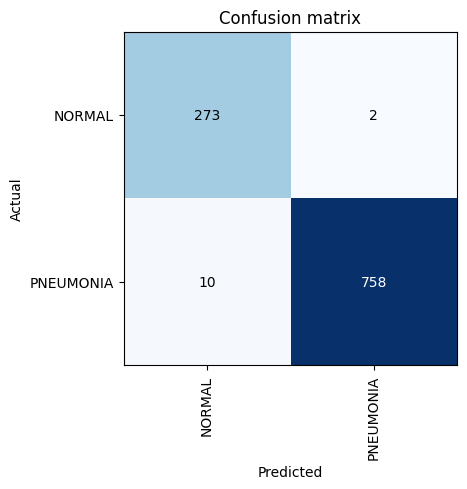

In [34]:
# tekshirish
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

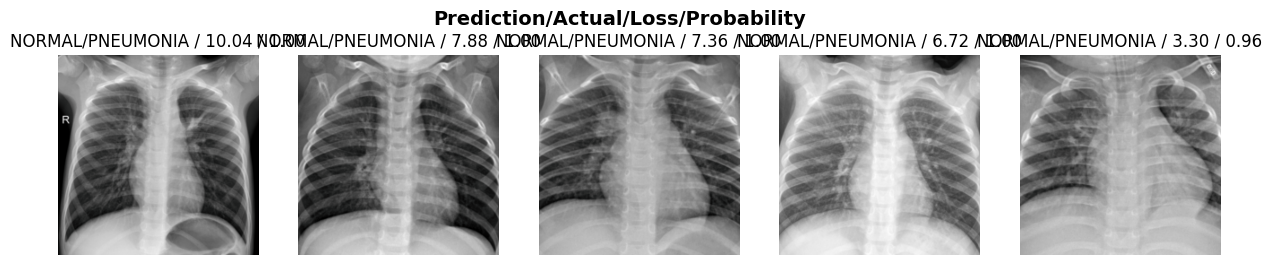

In [35]:
interp.plot_top_losses(5, nrows=1)

In [15]:
import pandas as pd
import numpy as np

In [26]:
df = pd.read_csv("/content/drive/MyDrive/pnevmoniya/sample_solution.csv")
df.head()

,id,labels
0,test_img_10001.jpeg,0
1,test_img_10002.jpeg,0
2,test_img_10003.jpeg,0
3,test_img_10004.jpeg,0
4,test_img_10005.jpeg,0


In [18]:
df.shape[0]

624

In [36]:
#sample solution faylini tayyorlash jarayoni
for i in range(df.shape[0]):
    label = df.iloc[i,0]
    img = PILImage.create(Path(f'/content/drive/MyDrive/pnevmoniya/test/{label}'))
    pred, pred_id, prob = learn.predict(img)
    df.iloc[i,1] = pred

In [39]:
#parent labellarni o'zgartiramiz
df['labels'] = df['labels'].replace({'PNEUMONIA':1, 'NORMAL':0})
df.to_csv('pne_solution2.csv', index=False)

In [40]:
df.head()

,id,labels
0,test_img_10001.jpeg,1
1,test_img_10002.jpeg,0
2,test_img_10003.jpeg,1
3,test_img_10004.jpeg,1
4,test_img_10005.jpeg,0


In [42]:
#Modelni saqlab olamiz
learn.export('pnevmoniya_tashxisi2.pkl')